# Generate Synthetic Data

## Notes 
### Required installing Oracle JAVA 8 to get javabridge installed
### Then, I was able to install py-causal from https://bd2kccd.github.io/docs/py-causal/
### GFCI is slower than RFCI, but more accurate (SPIRTES), GFCI and RFCI account for unobserved variables, FGES assumes no unobserved variables.

Structure Learning Performance Guarantees If the assumptions in the previous section hold, then in the large sample limit, the CBN structure output by GFCId will contain an edge of one of four kinds between Xand Y   if and only if Xand Yare not independent conditional on any subset of the other measured variables of less than or equal to a specified size. In addition, there is (1) an arc X->Y   if and only if Xdirectly or indirectly causes Y, and Y   does not directly or indirectly cause X; (2) an edge X <-->Y   if and only if X   is not a direct or indirect cause of Yand Y   is not a direct or indirect cause of X(which can only occur if there are latent confounders of Xand some other variable or Yand some other variable; (3) an edge Xo->Y   only if Yis not a direct or indirect cause of X, but Xmay or may not be an indirect cause of Y; (4) an edge X o–o Y   indicates that Xand Y   are dependent no matter what subset of observed variables is conditioned on, but contains no orientation information (X   may be a direct or indirect cause of Y, and Ymay be an indirect cause of X, or there may be a latent common cause of Xand Y.

In [1]:
#Synthetic data
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
def transform1(x):
    return x * random.randint(1,2) + random.randint(0,10)

def transform2(x):
    return x * random.randint(1,2) + random.randint(0,10)

center = 0
std_dev = 1
nb_samples = 1000000
gauss = np.random.normal(loc = center, scale = std_dev, size = nb_samples)
X = gauss * 3
Y = transform1(X)
Z = transform2(Y)

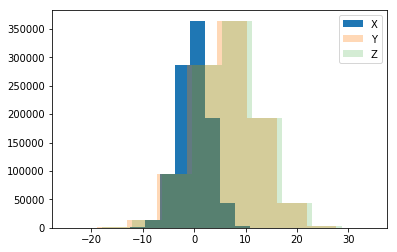

In [3]:
plt.hist(X, alpha = 1, label = 'X')
plt.hist(Y, alpha = 0.3, label = 'Y')
plt.hist(Z, alpha = 0.2, label = 'Z')

plt.legend(loc = 'upper right')
plt.show()

# Steps
### 1) Use various ml algorithms to predict Z* given X, Y
### 2) Use the PC algorithm on each to vizualize a graph.

In [71]:
from pcalg import *

import networkx as nx
import numpy as np
from gsq.ci_tests import ci_test_bin, ci_test_dis
from gsq.gsq_testdata import bin_data, dis_data



In [72]:
dm = np.array(dis_data).reshape((10000, 5))
(g, sep_set) = estimate_skeleton(indep_test_func=ci_test_dis,
                             data_matrix=dm,
                             alpha=0.01)
g = estimate_cpdag(skel_graph=g, sep_set=sep_set)

print('Edges are:', g.edges(), end='')

dmt = np.transpose(dm)
#dmt[3].copy()
dmt = np.append(dmt[1:].copy(), [dmt[0].copy()], axis =0)
#dmt = dmt[1:]
dmt = np.transpose(dmt)
dmt = dmt.copy()+dmt.copy()
dm = np.array(dis_data).reshape((10000, 5))
(g, sep_set) = estimate_skeleton(indep_test_func=ci_test_dis,
                             data_matrix=dmt,
                             alpha=0.01)
g = estimate_cpdag(skel_graph=g, sep_set=sep_set)

print('Edges are:', g.edges(), end='')

Edges are: [(0, 2), (1, 2), (1, 3), (4, 3)]

/home/tkyono/anaconda3/lib/python3.6/site-packages/gsq/discrete.py:100: RuntimeWarning: invalid value encountered in true_divide
  tlog = nijk * row_size / tdij
/home/tkyono/anaconda3/lib/python3.6/site-packages/gsq/discrete.py:74: RuntimeWarning: invalid value encountered in true_divide
  tlog[:, :, k] = nijk[:, :, k] * nk[k] / tdijk


Edges are: [(0, 1), (0, 2), (3, 2), (4, 1)]

In [88]:
import numpy as np
import pandas as pd
from pcalg import *

import networkx as nx
import numpy as np
from gsq.ci_tests import ci_test_bin, ci_test_dis
from gsq.gsq_testdata import bin_data, dis_data
def generate_data(n_samples=10000, set_X=None, show_z=True):
    p_z = 0.5
    p_x_z = [0.9, 0.1]
    p_y_xz = [0.2, 0.4, 0.6, 0.8]
    Z = np.random.binomial(n=1, p=p_z, size=n_samples)
    if set_X is not None:
        assert(len(set_X) == n_samples)
        X = set_X
    else:
        p_x = np.choose(Z, p_x_z)
        X = np.random.binomial(n=1, p=p_x, size=n_samples)
        
    p_y = np.choose(X+2*Z, p_y_xz)
    Y = np.random.binomial(n=1, p=p_y, size=n_samples)
    if show_z:
        return pd.DataFrame({"x":X, "y":Y, "z":Z})
    
    return pd.DataFrame({"x":X, "y":Y})



def generate_data2(n_samples=5000):
    p_z = 0.5
    p_x_z = [0.9, 0.1]
    p_y_xz = [0.2, 0.8]
    p_x_y = [0.9, 0.1]
    Z = np.random.binomial(n=1, p=p_z, size=n_samples)
    
    p_y = np.choose(Z, p_y_xz)
    Y = np.random.binomial(n=1, p=p_y, size=n_samples)
    
    p_x = np.choose(Y, p_x_y)
    X = np.random.binomial(n=1, p=p_x, size=n_samples)

    return pd.DataFrame({"x":X, "y":Y, "z":Z}) 


def random_data(n_samples=5000):
    p_z = 0.5

    Z = np.random.binomial(n=1, p=p_z, size=n_samples)
    Y = np.random.binomial(n=1, p=p_z, size=n_samples)
    X = np.random.binomial(n=1, p=p_z, size=n_samples)

    return pd.DataFrame({"x":X, "y":Y, "z":Y}) 



gen_df = generate_data()

from pcalg import *

import networkx as nx
import numpy as np
from gsq.ci_tests import ci_test_bin, ci_test_dis
from gsq.gsq_testdata import bin_data, dis_data


(g, sep_set) = estimate_skeleton(indep_test_func=ci_test_dis,
                                 data_matrix=gen_df.values,
                                 alpha=0.01)
g = estimate_cpdag(skel_graph=g, sep_set=sep_set)

print('Edges are:', g.edges(), end='')

Edges are: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]

In [89]:
df = gen_df


samplePrior: Sample prior (min = 1.0) (java.lang.Double) [default:1.0]
structurePrior: Structure prior coefficient (min = 1.0) (java.lang.Double) [default:1.0]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
symmetricFirstStep: Yes if the first step step for FGES should do scoring for both X->Y and Y->X (java.lang.Boolean) [default:false]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:4]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:true]
numberResampling: The number of bootstraps/resampling iterations (min = 0) (java.lang.Integer) [default:0]
percentResampleSize: The percentage of resample size (min = 0.1) (java.lang.Integer) [default:100]
resamplingWithReplacement: Yes, if sampling with replacement (bootstrapping) (java.lang.Boolean) [default:true]
resamplingEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [defau

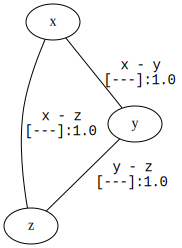

In [90]:
import pandas as pd
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '500M')
from pycausal import prior as p
#forbid = [['history_noise','class'],['history_fluctuating','class']]
#tempForbid = p.ForbiddenWithin(
#    ['class','history_fluctuating','history_noise'])
#temporal = [tempForbid]
#prior = p.knowledge(forbiddirect = forbid, addtemporal = temporal)
#prior
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'bdeu')
tetrad.run(algoId = 'fges', dfs = df, scoreId = 'bdeu', dataType = 'discrete',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True, 
           numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

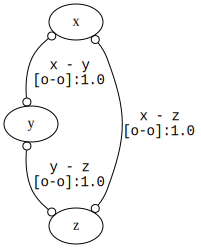

In [91]:
#BOOTSTRAP GFCI
tetrad.run(algoId = 'gfci', dfs = df, testId = 'disc-bic', scoreId = 'bdeu', dataType = 'discrete',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
           numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)


import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

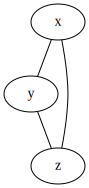

In [92]:
#FGES
tetrad.run(algoId = 'fges', dfs = df, scoreId = 'bdeu', 
           #priorKnowledge = prior, 
           dataType = 'discrete',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

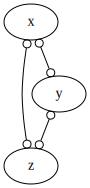

In [93]:
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'bdeu', scoreId = 'bdeu', dataType = 'discrete',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [94]:
pc.extractTetradGraphEdges(tetrad.getTetradGraph())

['x o-o z', 'z o-o y', 'y o-o x']

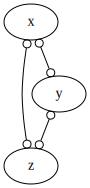

In [95]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [47]:
dm = np.array(bin_data).reshape((5000, 5))
df = pd.DataFrame(dm, columns = ['a', 'b', 'c', 'd', 'e']) 